In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.data import Dataset

In [3]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [4]:
y = data.pop('label').values
X = data.values

In [5]:
print(len(X), len(y))

42000 42000


In [6]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, pd.get_dummies(y).values, test_size = 0.25)

In [7]:
xtrain = xtrain/255.0
xtest = xtest/255.0
xtrain[0].shape

(784,)

In [8]:
xtrain = xtrain.reshape(-1, 28, 28, 1)
xtest = xtest.reshape(-1, 28, 28, 1)

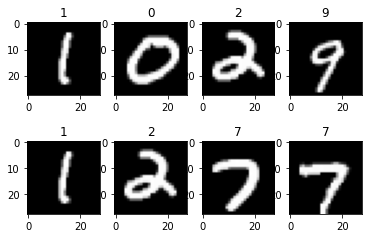

In [9]:
fig, axs = plt.subplots(2, 4)
for i in range(2):
    for j in range(4):
        axs[i, j].imshow(xtrain[i*j + j].reshape((28,28)), cmap='gray')
        axs[i, j].set_title(str(np.argmax(ytrain[i*j + j])))
plt.show()

In [10]:
from keras.preprocessing.image import ImageDataGenerator
imageGen = ImageDataGenerator  (rotation_range=10,
                                width_shift_range=0.07,
                                height_shift_range=0.07,
                                shear_range=4,
                                zoom_range=0.03)

In [11]:
augData = imageGen.flow(xtrain, ytrain)

(32, 10)


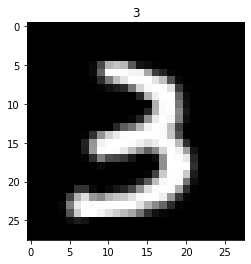

In [18]:
#Printing a random image from 0 to 100

i = augData[np.random.randint(0, 100)]
print(i[1].shape)
plt.imshow(i[0][0,:,:,0], cmap='gray')
plt.title(str(np.argmax(i[1][0])))
plt.show()

In [19]:
# Max Pooling because in black background 

model = tf.keras.models.Sequential(layers = [   
            keras.layers.Conv2D(filters=64, kernel_size=(5, 5), activation='relu'),
            keras.layers.MaxPool2D(pool_size=(2,2)),
            keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
            keras.layers.MaxPool2D(pool_size=(2,2)),
            keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
            keras.layers.Flatten(),    
            keras.layers.Dense(256, activation='relu'),
            keras.layers.Dropout(0.2),
            keras.layers.Dense(10, activation='softmax')
        ])

model.compile(optimizer='adam', 
              loss=keras.losses.CategoricalCrossentropy(from_logits=False), 
              metrics=['accuracy'])

In [20]:
model.fit(xtrain, ytrain, epochs=5, validation_data=(xtest, ytest))

Epoch 1/5
985/985 [==============================] - 24s 24ms/step - loss: 0.2352 - accuracy: 0.9253 - val_loss: 0.0730 - val_accuracy: 0.9764
Epoch 2/5
985/985 [==============================] - 23s 23ms/step - loss: 0.0683 - accuracy: 0.9783 - val_loss: 0.0500 - val_accuracy: 0.9837
Epoch 3/5
985/985 [==============================] - 23s 24ms/step - loss: 0.0485 - accuracy: 0.9849 - val_loss: 0.0467 - val_accuracy: 0.9853
Epoch 4/5
985/985 [==============================] - 23s 24ms/step - loss: 0.0408 - accuracy: 0.9870 - val_loss: 0.0412 - val_accuracy: 0.9870
Epoch 5/5
985/985 [==============================] - 23s 23ms/step - loss: 0.0326 - accuracy: 0.9896 - val_loss: 0.0470 - val_accuracy: 0.9861


In [21]:
model.fit(augData, epochs=5, validation_data=(xtest, ytest))

Epoch 1/5
985/985 [==============================] - 28s 29ms/step - loss: 0.0932 - accuracy: 0.9717 - val_loss: 0.0402 - val_accuracy: 0.9876
Epoch 2/5
985/985 [==============================] - 28s 28ms/step - loss: 0.0666 - accuracy: 0.9802 - val_loss: 0.0316 - val_accuracy: 0.9910
Epoch 3/5
985/985 [==============================] - 28s 29ms/step - loss: 0.0573 - accuracy: 0.9823 - val_loss: 0.0311 - val_accuracy: 0.9897
Epoch 4/5
985/985 [==============================] - 28s 28ms/step - loss: 0.0503 - accuracy: 0.9839 - val_loss: 0.0307 - val_accuracy: 0.9910
Epoch 5/5
985/985 [==============================] - 28s 29ms/step - loss: 0.0485 - accuracy: 0.9853 - val_loss: 0.0280 - val_accuracy: 0.9919


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, None, None, 64)    1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, None, None, 64)    0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 32)    18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, None, None, 32)    0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 32)    9248      
_________________________________________________________________
flatten (Flatten)            (None, None)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               7

In [23]:
pred = model.predict(test.values.reshape(-1, 28, 28, 1))
pred = np.argmax(pred, axis = 1)

In [24]:
pred

array([2, 0, 9, ..., 3, 9, 2])

In [25]:
submission = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
submission['Label'] = pred.astype("int64")

In [26]:
submission.to_csv('MNISTCNN.csv', index = False)
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
